In [1]:
import copy
import re
import csv
import codecs
from random import shuffle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from nltk.corpus import floresta as flt
# from nltk.corpus import mac_morpho as mcm

from utils import load_six_emotions, load_3_emotions, generate_corpus
from unsupervised.emotional_lsa import EmotionalLSA

np.random.seed(12345)

%matplotlib inline

In [2]:
# Create a function called "chunks" with two arguments, l and n:
def chunks(l, n):
    # For item i in a range that is a length of l,
    for i in range(0, len(l), n):
        # Create an index range for l of n items:
        yield l[i:i+n]


print('Loading emotional words: ')
emotion_words = load_six_emotions('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/emocoes')
emotion_words_n = load_3_emotions('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/emocoes')
emotion_words['NEUTRO'] = emotion_words_n['NEUTRO']

rep = [
    ('\n', '. '), ('"', ''), ('@', ''), 
    ('#', ''), ('RT', ''), (r'(http[s]*?:\/\/)+.*[\r\n]*', '')
]

Loading emotional words: 


## Validação 1

Validaremos o algoritmo, adicionando o em uma das 6 emoções definidas + 1 neutro.

Utilizaremos uma base com aproximadamente 3000 frases diversas.

In [9]:
# with open('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/frases.txt') as h:
with open('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/frases.txt') as h:
    original_phrases = h.readlines()
original_phrases = original_phrases[:1500]
phrases = copy.deepcopy(original_phrases)
# phrases += [' '.join(f).replace('_', ' ') for f in flt.sents()[:2000]]
# phrases += [' '.join(f).replace('_', ' ') for f in mch.sents()[:2000]]
# phrases += [' '.join(f).replace('_', ' ') for f in mcm.sents()[:2000]]
phrases = generate_corpus(phrases)
ldocs = [f'D{i}' for i in range(len(original_phrases))]

In [10]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(phrases, copy.deepcopy(emotion_words))

Starting EmotionalLSA model...
fit and transform...
using Count...
Actual number of features: 3147
--- 0.051801204681396484 seconds ---
Calculating SVD...
--- 3.96207594871521 seconds ---
Processing emotional state... this may take a while...
--- 0.0013370513916015625 seconds ---
Generating emotional state from lexicon...
--- 36.08940052986145 seconds ---
Calculating final emotional matrix...
--- 1.6883869171142578 seconds ---


In [11]:
df = pd.DataFrame(predicted[:len(original_phrases)], index=ldocs, columns=emotion_words.keys())

D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

D1 - "A religiao é o que impede o pobre de matar o rico.

D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

D5 - A adolescência é como uma casa em dia de mudanças: Uma desordem temporária.

D6 - A adversidade desperta em nós capacidades que, em circunstâncias favoráveis, teriam ficado adormecidas.

D7 - A adversidade põe à prova os espíritos.



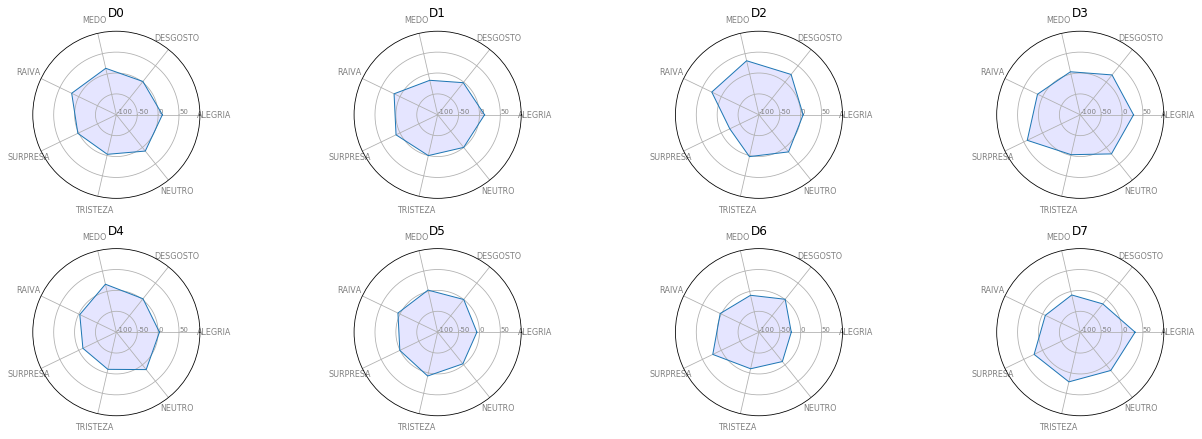

In [12]:
categories = list(df)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(18, 12))
for m in range(8):
    idx = m + 1
    
    values = df.loc[f'D{m}'].values
    values = np.append(values, values[0])
    print(f'D{m} - {original_phrases[m]}')
    # Initialise the spider plot
    ax = plt.subplot(4, 4, idx, polar=True)
    # Title
    plt.title(f'D{m}')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(range(-100, 100, 50), [f'{i}' for i in range(-100, 100, 50)], color="grey", size=7)
    plt.ylim(-100, 100)
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

plt.tight_layout()
plt.show()

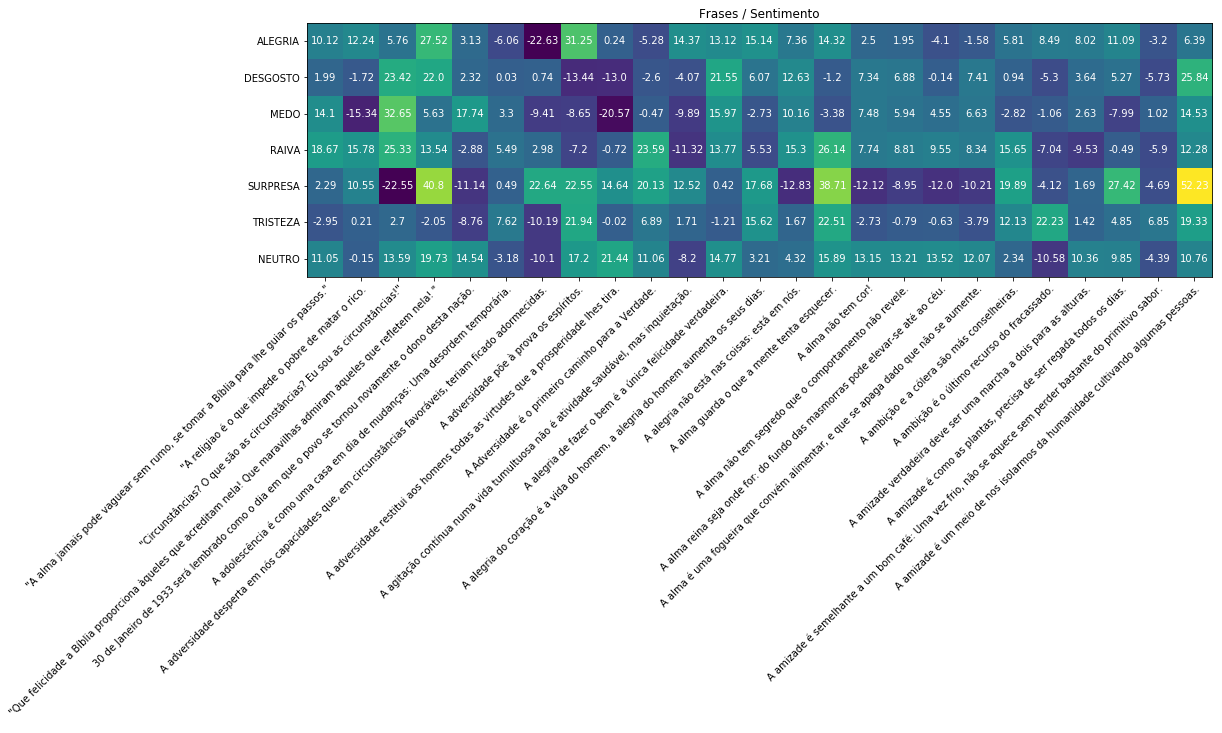

In [13]:
N = 25

categories = list(df)
k_phrases = original_phrases[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

In [14]:
for i, frase in enumerate(original_phrases[:10]):
    print('-' * 20)
    print(f'D{i} - {frase}')
    print(df.loc[f'D{i}'])

--------------------
D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

ALEGRIA     10.12
DESGOSTO     1.99
MEDO        14.10
RAIVA       18.67
SURPRESA     2.29
TRISTEZA    -2.95
NEUTRO      11.05
Name: D0, dtype: float64
--------------------
D1 - "A religiao é o que impede o pobre de matar o rico.

ALEGRIA     12.24
DESGOSTO    -1.72
MEDO       -15.34
RAIVA       15.78
SURPRESA    10.55
TRISTEZA     0.21
NEUTRO      -0.15
Name: D1, dtype: float64
--------------------
D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

ALEGRIA      5.76
DESGOSTO    23.42
MEDO        32.65
RAIVA       25.33
SURPRESA   -22.55
TRISTEZA     2.70
NEUTRO      13.59
Name: D2, dtype: float64
--------------------
D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

ALEGRIA     27.52
DESGOSTO    22.00
MEDO         5.63
RAIVA       13.54
SURPRESA    40.80
TRISTEZA    -2.05
NEUTRO

## Validação 2

Utilizaremos os mesmos dados, entretanto agora categorizaremos as frases acima, nas categorias POSITIVO, NEGATIVO e NEUTRO.

In [15]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(phrases, copy.deepcopy(emotion_words_n))
    
size = len(original_phrases)
df = pd.DataFrame(predicted, index=ldocs, columns=emotion_words_n.keys())

Starting EmotionalLSA model...
fit and transform...
using Count...
Actual number of features: 3147
--- 0.05484127998352051 seconds ---
Calculating SVD...
--- 4.795079708099365 seconds ---
Processing emotional state... this may take a while...
--- 0.0020341873168945312 seconds ---
Generating emotional state from lexicon...
--- 52.66640281677246 seconds ---
Calculating final emotional matrix...
--- 0.7385780811309814 seconds ---


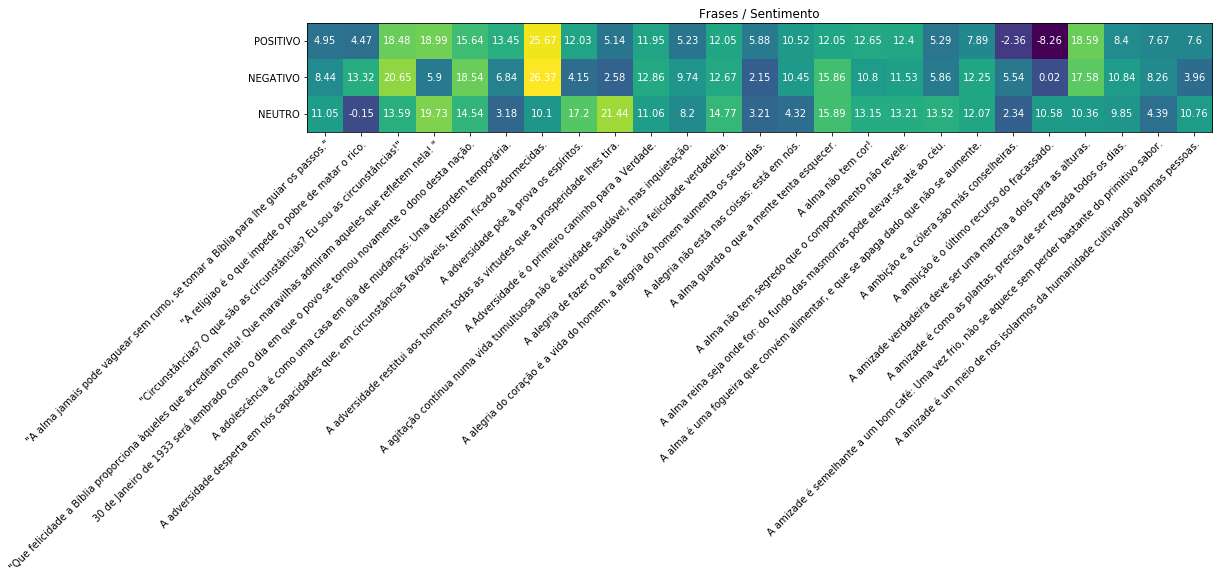

In [16]:
N = 25

categories = list(df)
k_phrases = original_phrases[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

D1 - "A religiao é o que impede o pobre de matar o rico.

D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

D5 - A adolescência é como uma casa em dia de mudanças: Uma desordem temporária.

D6 - A adversidade desperta em nós capacidades que, em circunstâncias favoráveis, teriam ficado adormecidas.

D7 - A adversidade põe à prova os espíritos.

D8 - A adversidade restitui aos homens todas as virtudes que a prosperidade lhes tira.

D9 - A Adversidade é o primeiro caminho para a Verdade.

D10 - A agitação contínua numa vida tumultuosa não é atividade saudável, mas inquietação.

D11 - A alegria de fazer o bem é a única felicidade verdadeira.

D12 -

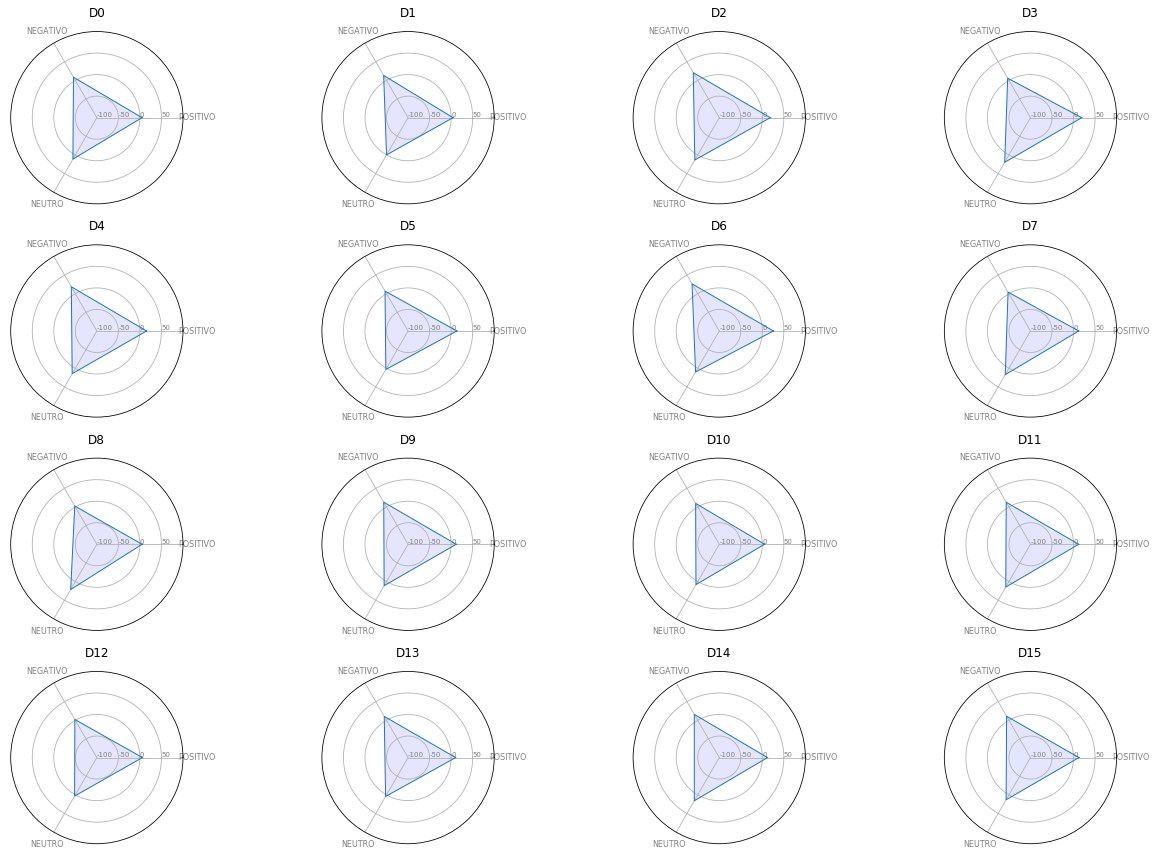

In [17]:
categories = list(df)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(18, 12))
for m in range(16):
    idx = m + 1
    
    values = df.loc[f'D{m}'].values
    values = np.append(values, values[0])
    print(f'D{m} - {original_phrases[m]}')
    # Initialise the spider plot
    ax = plt.subplot(4, 4, idx, polar=True)
    # Title
    plt.title(f'D{m}')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(range(-100, 100, 50), [f'{i}' for i in range(-100, 100, 50)], color="grey", size=7)
    plt.ylim(-100, 100)
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

plt.tight_layout()
plt.show()

In [18]:
for i, frase in enumerate(original_phrases[:25]):
    print('-' * 20)
    print(f'D{i} - {frase}')
    print(df.loc[f'D{i}'])

--------------------
D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

POSITIVO     4.95
NEGATIVO     8.44
NEUTRO      11.05
Name: D0, dtype: float64
--------------------
D1 - "A religiao é o que impede o pobre de matar o rico.

POSITIVO     4.47
NEGATIVO    13.32
NEUTRO      -0.15
Name: D1, dtype: float64
--------------------
D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

POSITIVO    18.48
NEGATIVO    20.65
NEUTRO      13.59
Name: D2, dtype: float64
--------------------
D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

POSITIVO    18.99
NEGATIVO     5.90
NEUTRO      19.73
Name: D3, dtype: float64
--------------------
D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

POSITIVO    15.64
NEGATIVO    18.54
NEUTRO      14.54
Name: D4, dtype: float64
--------------------
D5 - A adolescência é c

## Validação 

Validaremos o algoritmo em uma base de 40000 tweets coletados. Categorizaremos em POSITIVO, NEGATIVO e NEUTRO.

In [19]:
original_tweets = []
sents = []
filename = '/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/tweets-tratados-polaridade-10-10-2018.csv'
with open(filename, 'r') as h:
    reader = csv.reader(h, delimiter='|')
    for row in reader:
        tweet = row[1]
        tweet_sent = row[2]
        for o, r in rep:
            tweet = re.sub(o, r, tweet, flags=re.MULTILINE)
        if len(tweet) > 5:
            original_tweets += [tweet]
            sents += [tweet_sent]        

print('Starting NLP clean up...')
tweets = generate_corpus(original_tweets[:2000])
ltweets = [f'D{i}' for i in range(len(tweets))]

Starting NLP clean up...


In [20]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(tweets, copy.deepcopy(emotion_words_n))

Starting EmotionalLSA model...
fit and transform...
using Count...
Actual number of features: 4221
--- 0.03565049171447754 seconds ---
Calculating SVD...
--- 7.146673917770386 seconds ---
Processing emotional state... this may take a while...
--- 0.001958131790161133 seconds ---
Generating emotional state from lexicon...
--- 52.295470237731934 seconds ---
Calculating final emotional matrix...
--- 0.9491934776306152 seconds ---


In [21]:
df = pd.DataFrame(predicted, index=ltweets, columns=emotion_words_n.keys())

### Acurácia

In [22]:
accuracy = 0
change_sent = [('POSITIVE', 'POSITIVO'), ('NEGATIVE', 'NEGATIVO'), ('NEUTRAL', 'NEUTRO')]
for i, frase in enumerate(tweets):
    for org, new in change_sent:
        sentimento_original = sents[i].upper()
        if sentimento_original == org:
            sentimento_original = new
            break
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if sentimento_original == calculado:
        accuracy += 1
accuracy = np.round((accuracy / len(tweets)) * 100)
print(f'Accuracy: {accuracy}%')

Accuracy: 35.0%


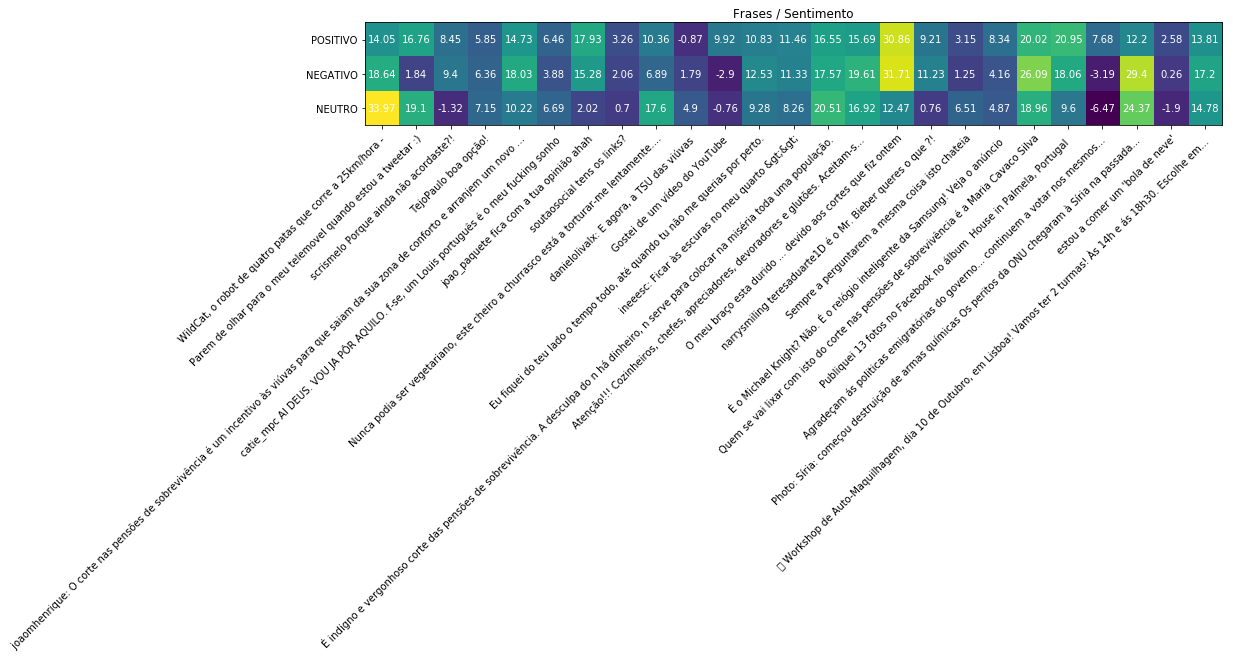

In [23]:
N = 25

categories = list(df)
k_phrases = original_tweets[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

In [24]:
for i, frase in enumerate(original_tweets[:25]):
    print('-' * 20)
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    print(f'D{i} - {frase}')
    print(f'ORIGINAL : {sents[i].upper()}')
    print(f'CALCULADO : {calculado}')
    print(df.loc[f'D{i}'])

--------------------
D0 - WildCat, o robot de quatro patas que corre a 25km/hora - 
ORIGINAL : NEUTRAL
CALCULADO : NEUTRO
POSITIVO    14.05
NEGATIVO    18.64
NEUTRO      33.97
Name: D0, dtype: float64
--------------------
D1 - Parem de olhar para o meu telemovel quando estou a tweetar :)
ORIGINAL : POSITIVE
CALCULADO : NEUTRO
POSITIVO    16.76
NEGATIVO     1.84
NEUTRO      19.10
Name: D1, dtype: float64
--------------------
D2 - scrismelo Porque ainda não acordaste?!
ORIGINAL : NEUTRAL
CALCULADO : NEGATIVO
POSITIVO    8.45
NEGATIVO    9.40
NEUTRO     -1.32
Name: D2, dtype: float64
--------------------
D3 - TejoPaulo boa opção!
ORIGINAL : NEUTRAL
CALCULADO : NEUTRO
POSITIVO    5.85
NEGATIVO    6.36
NEUTRO      7.15
Name: D3, dtype: float64
--------------------
D4 -  joaomhenrique: O corte nas pensões de sobrevivência é um incentivo às viúvas para que saiam da sua zona de conforto e arranjem um novo …
ORIGINAL : NEUTRAL
CALCULADO : NEGATIVO
POSITIVO    14.73
NEGATIVO    18.03
NEUTRO     

### Validação 4

In [25]:
original_tweets = []
sents = []
filename = '/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/tweets_mg2.csv'
with open(filename, 'r') as h:
    reader = csv.reader(h, delimiter='|')
    for row in reader:
        tweet = row[2]
        tweet_sent = row[9]
        for o, r in rep:
            tweet = re.sub(o, r, tweet, flags=re.MULTILINE)
        if len(tweet) > 5:
            original_tweets += [tweet]
            sents += [tweet_sent]

print('Starting NLP clean up...')
tweets = generate_corpus(original_tweets[:500])
ltweets = [f'D{i}' for i in range(len(tweets))]

Starting NLP clean up...


In [26]:
for inter_phrases in chunks(tweets, 100):
    inter_ltweets = [f'D{i}' for i in range(len(inter_phrases))]
    print('Starting EmotionalLSA model...')
    model = EmotionalLSA(use_tfidf=True, debug=False)
    print('fit and transform...')
    predicted = model.fit_transform(inter_phrases, copy.deepcopy(emotion_words_n))
    df = pd.DataFrame(predicted, index=inter_ltweets, columns=emotion_words_n.keys())
    
    accuracy = 0
    for i, frase in enumerate(inter_phrases):
        sentimento_original = sents[i].upper()
        calculado = df.loc[f'D{i}'].idxmax(axis=1)
        if sentimento_original == calculado:
            accuracy += 1
    accuracy = np.round((accuracy / len(inter_phrases)) * 100, 2)
    print(f'Accuracy: {accuracy}%')

Starting EmotionalLSA model...
fit and transform...
Accuracy: 30.0%
Starting EmotionalLSA model...
fit and transform...
Accuracy: 38.0%
Starting EmotionalLSA model...
fit and transform...
Accuracy: 30.0%
Starting EmotionalLSA model...
fit and transform...
Accuracy: 35.0%
Starting EmotionalLSA model...
fit and transform...
Accuracy: 43.0%


In [27]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(tweets, emotion_words_n)

Starting EmotionalLSA model...
fit and transform...
using Count...
Actual number of features: 1837
--- 0.012136220932006836 seconds ---
Calculating SVD...
--- 0.1523289680480957 seconds ---
Processing emotional state... this may take a while...
--- 0.0017843246459960938 seconds ---
Generating emotional state from lexicon...
--- 11.297935247421265 seconds ---
Calculating final emotional matrix...
--- 0.24271726608276367 seconds ---


In [28]:
df = pd.DataFrame(predicted, index=ltweets, columns=emotion_words_n.keys())

In [29]:
accuracy = 0
for i, frase in enumerate(tweets):
    sentimento_original = sents[i].upper()
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if sentimento_original == calculado:
        accuracy += 1
accuracy = np.round((accuracy / len(tweets)) * 100, 2)
print(f'Accuracy: {accuracy}%')

Accuracy: 31.8%


In [30]:
for i, frase in enumerate(original_tweets[:25]):
    print('-' * 20)
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    print(f'D{i} - {frase}')
    print(f'ORIGINAL : {sents[i].upper()}')
    print(f'CALCULADO : {calculado}')
    print(df.loc[f'D{i}'])

--------------------
D0 - ���⛪  Catedral de Santo Antônio - Governador Valadares/MG 
ORIGINAL : NEUTRO
CALCULADO : POSITIVO
POSITIVO    11.25
NEGATIVO    -3.42
NEUTRO       8.75
Name: D0, dtype: float64
--------------------
D1 - �  Governador Valadares, Minas Gerais 
ORIGINAL : NEUTRO
CALCULADO : NEUTRO
POSITIVO    15.01
NEGATIVO     6.41
NEUTRO      18.47
Name: D1, dtype: float64
--------------------
D2 - ��  Governador Valadares, Minas Gerais 
ORIGINAL : NEUTRO
CALCULADO : NEUTRO
POSITIVO    15.01
NEGATIVO     6.41
NEUTRO      18.47
Name: D2, dtype: float64
--------------------
D3 - ��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas 
ORIGINAL : NEGATIVO
CALCULADO : NEGATIVO
POSITIVO    19.04
NEGATIVO    25.07
NEUTRO      19.17
Name: D3, dtype: float64
--------------------
D4 -  bom é bandido morto. Deputado Cabo Júlio é condenado e fica inelegível por 10 anos - Politica - Estado de Minas 
ORIGINAL : NEUTRO
CALCULADO : NEGATIVO
POSIT

## Validação 5

In [3]:
original_tweets = []
sents1 = []
sents2 = []
filename = '/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/50_tweets_mg.csv'
with codecs.open(filename, encoding="utf-8") as h:
    reader = csv.reader(h, delimiter='|')
    for row in reader:
        tweet = row[1]
        tweet_sent1 = row[2].upper()
        tweet_sent2 = row[3].upper()
        for o, r in rep:
            tweet = re.sub(o, r, tweet, flags=re.MULTILINE)
        if len(tweet) > 5:
            original_tweets += [tweet]
            sents1 += [tweet_sent1]
            sents2 += [tweet_sent2]

print('Starting NLP clean up...')
tweets = generate_corpus(original_tweets)
ltweets = [f'D{i}' for i in range(len(tweets))]

Starting NLP clean up...


In [7]:
inter_ltweets = [f'D{i}' for i in range(len(tweets))]
print('Starting EmotionalLSA model...')
model = EmotionalLSA(use_tfidf=True, debug=False)
print('fit and transform...')
predicted = model.fit_transform(tweets, copy.deepcopy(emotion_words_n))
df = pd.DataFrame(predicted, index=inter_ltweets, columns=emotion_words_n.keys())

accuracy1 = 0
accuracy2 = 0
for i, frase in enumerate(tweets):
    sentimento_original1 = sents1[i]
    sentimento_original2 = sents2[i]
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if sentimento_original1 == calculado:
        accuracy1 += 1
    if sentimento_original2 == calculado:
        accuracy2 += 1
accuracy1 = np.round((accuracy1 / len(tweets)) * 100, 2)
accuracy2 = np.round((accuracy2 / len(tweets)) * 100, 2)
print(f'Accuracy 1: {accuracy1}%')
print(f'Accuracy 2: {accuracy2}%')

Starting EmotionalLSA model...
fit and transform...
Accuracy 1: 46.0%
Accuracy 2: 42.0%


In [8]:
inter_ltweets = [f'D{i}' for i in range(len(tweets))]
print('Starting EmotionalLSA model...')
model = EmotionalLSA(use_tfidf=False, debug=False)
print('fit and transform...')
predicted = model.fit_transform(tweets, copy.deepcopy(emotion_words_n))
df = pd.DataFrame(predicted, index=inter_ltweets, columns=emotion_words_n.keys())

accuracy1 = 0
accuracy2 = 0
for i, frase in enumerate(tweets):
    sentimento_original1 = sents1[i]
    sentimento_original2 = sents2[i]
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if sentimento_original1 == calculado:
        accuracy1 += 1
    if sentimento_original2 == calculado:
        accuracy2 += 1
accuracy1 = np.round((accuracy1 / len(tweets)) * 100, 2)
accuracy2 = np.round((accuracy2 / len(tweets)) * 100, 2)
print(f'Accuracy 1: {accuracy1}%')
print(f'Accuracy 2: {accuracy2}%')

Starting EmotionalLSA model...
fit and transform...
Accuracy 1: 40.0%
Accuracy 2: 36.0%
